In [3]:

# About Dataset
# 📹Project Video available on YouTube - https://youtu.be/gu3Ot78j_Gc
# Airlines Flights Dataset for Different Cities
# The Flights Booking Dataset of various Airlines is a scraped datewise from a famous website in a structured format. The dataset contains the records of flight travel details between the cities in India. Here, multiple features are present like Source & Destination City, Arrival & Departure Time, Duration & Price of the flight etc.

# This data is available as a CSV file. We are going to analyze this data set using the Pandas DataFrame.

# This analyse will be helpful for those working in Airlines, Travel domain.

# Using this dataset, we answered multiple questions with Python in our Project.

# Q.1. What are the airlines in the dataset, accompanied by their frequencies?

# Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.

# Q.3. Show Bar Graphs representing the Source City & Destination City.

# Q.4. Does price varies with airlines ?

# Q.5. Does ticket price change based on the departure time and arrival time?

# Q.6. How the price changes with change in Source and Destination?

# Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?

# Q.8. How does the ticket price vary between Economy and Business class?

# Q.9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv(r"C:\Users\merav\OneDrive\study\DataSets\airlines_flights_data.csv")

In [6]:
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
#Cleaning the data
data.drop( columns = 'index', inplace = True)
data.isnull().sum() 


airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [10]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [11]:
# Q.1. What are the airlines in the dataset, accompanied by their frequencies?

In [12]:
# Checking how many Airlines are in the dataset

data['airline'].nunique()

6

In [13]:
data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [14]:
data['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

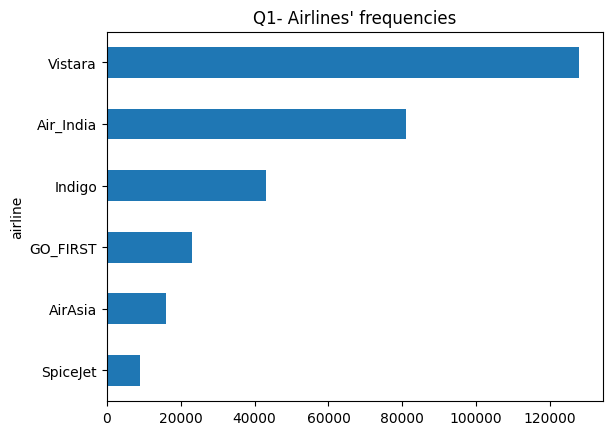

In [15]:
data['airline'].value_counts(ascending= 1).plot.barh()
plt.title("Q1- Airlines' frequencies")
plt.show()


In [16]:
# Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.

In [17]:
data['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [18]:
data['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

Text(0.5, 1.0, 'arrival_time')

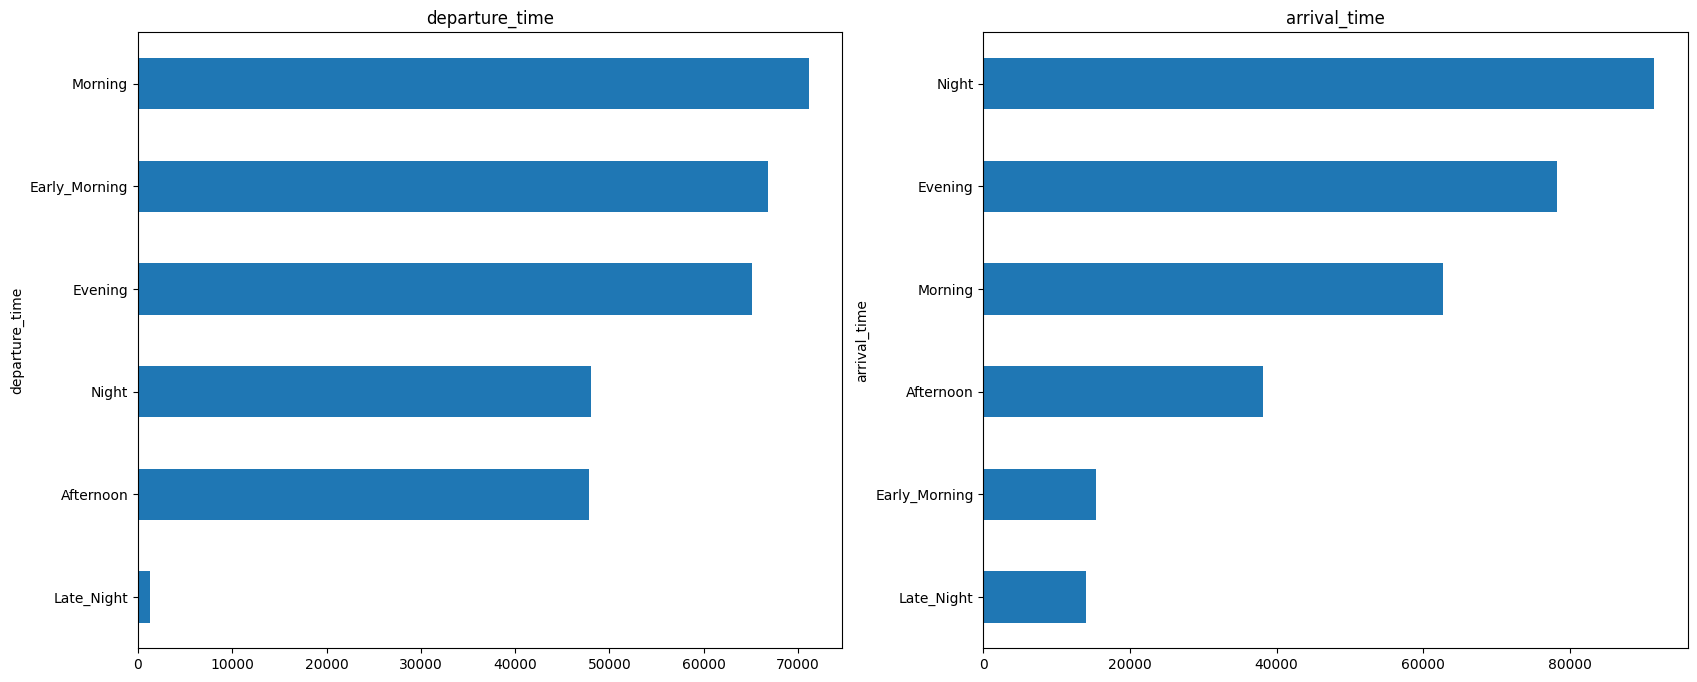

In [19]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
data['departure_time'].value_counts(ascending= 1).plot.barh()
plt.title("departure_time")

plt.subplot(1,2,2)
data['arrival_time'].value_counts(ascending= 1).plot.barh()
plt.title("arrival_time")

Text(0.5, 1.0, 'destination_city')

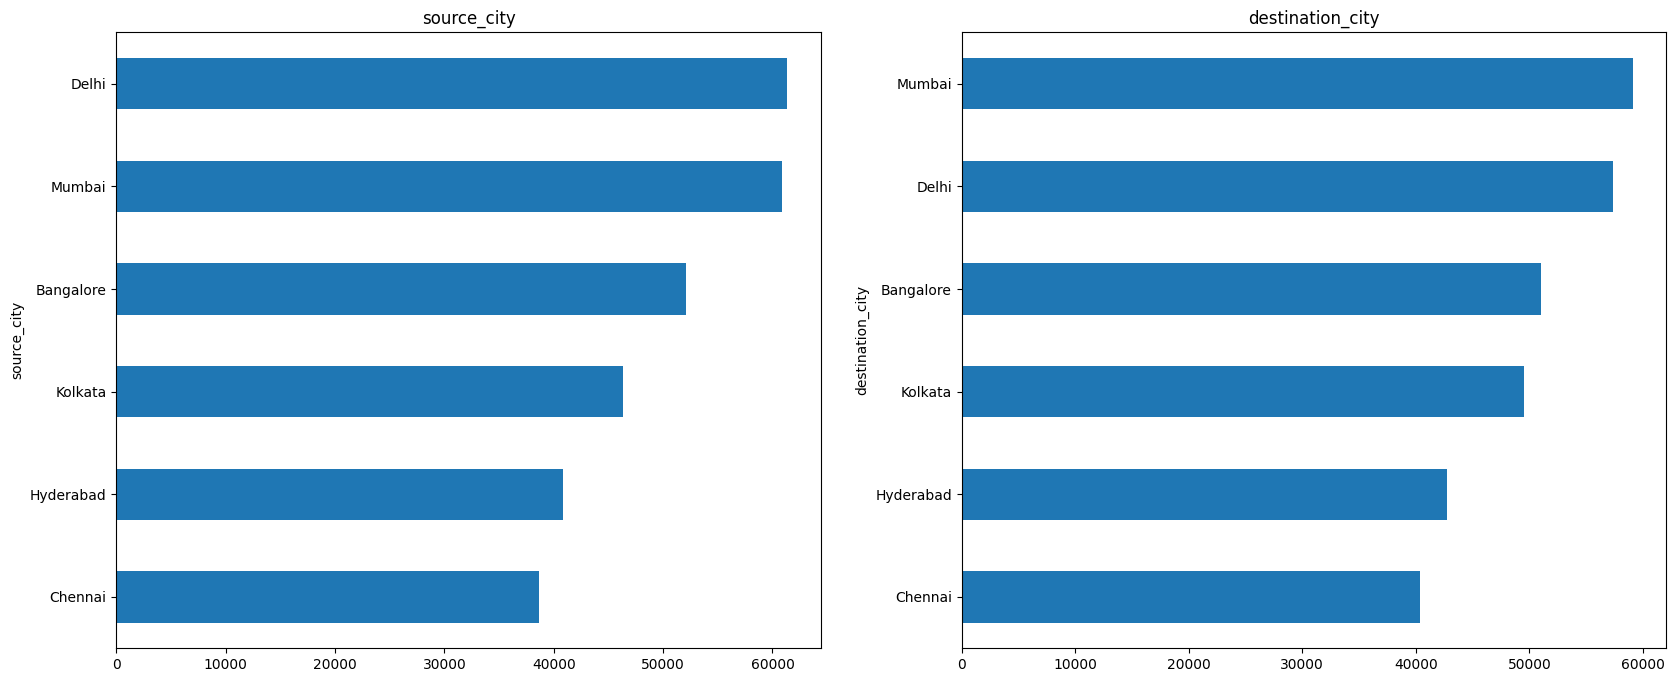

In [20]:
# Q.3. Show Bar Graphs representing the Source City & Destination City.

plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
data['source_city'].value_counts(ascending= 1).plot.barh()
plt.title("source_city")

plt.subplot(1,2,2)
data['destination_city'].value_counts(ascending= 1).plot.barh()
plt.title("destination_city")

In [21]:
# Q.4. Does price varies with airlines ?

In [22]:
#by price
data.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

In [23]:
#by hourly price
data.groupby('airline')['price'].mean()/data.groupby('airline')['duration'].mean()

airline
AirAsia       457.526657
Air_India    1516.167595
GO_FIRST      645.546808
Indigo        918.729185
SpiceJet      491.207739
Vistara      2280.886169
dtype: float64

c:\Users\merav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


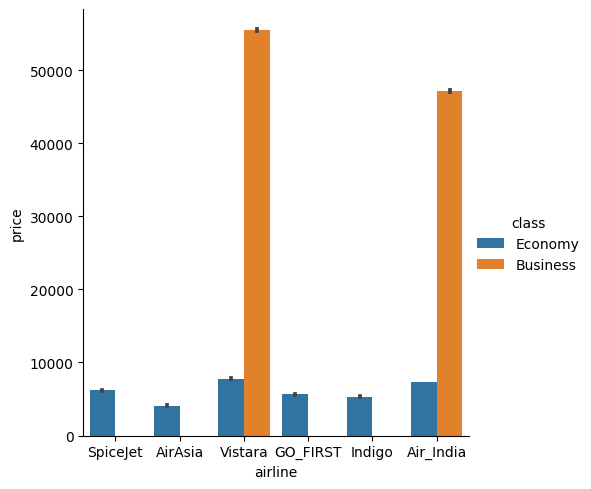

In [24]:
sns.catplot( x = 'airline', y = 'price', kind = 'bar', data = data, hue = 'class', )

plt.show()

In [25]:
# Q.5. Does ticket price change based on the departure time and arrival time?

In [26]:
data.groupby('departure_time')['price'].mean()



departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

c:\Users\merav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


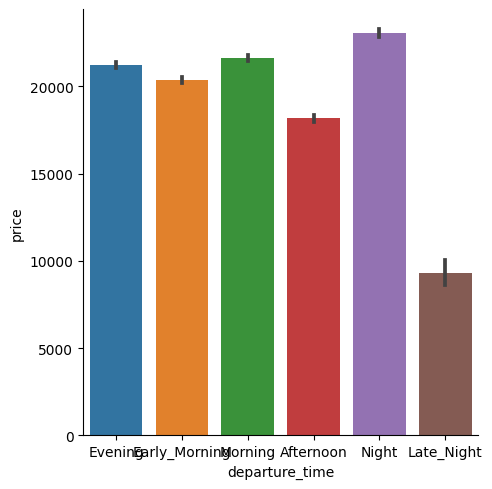

In [27]:
sns.catplot( x = 'departure_time', y = 'price', kind = 'bar', data = data )

plt.show()

In [28]:
data.groupby('arrival_time')['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

c:\Users\merav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


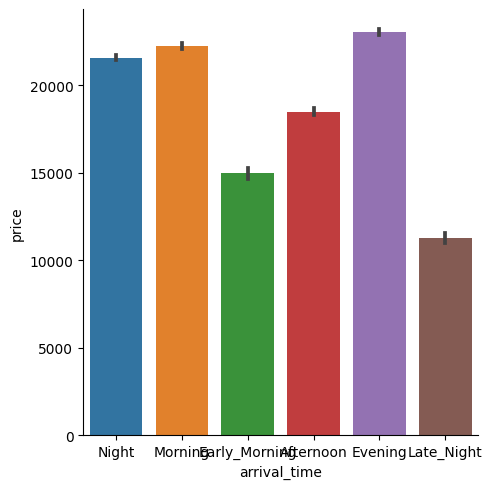

In [29]:
sns.catplot( x = 'arrival_time', y = 'price', kind = 'bar', data = data )

plt.show()

c:\Users\merav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


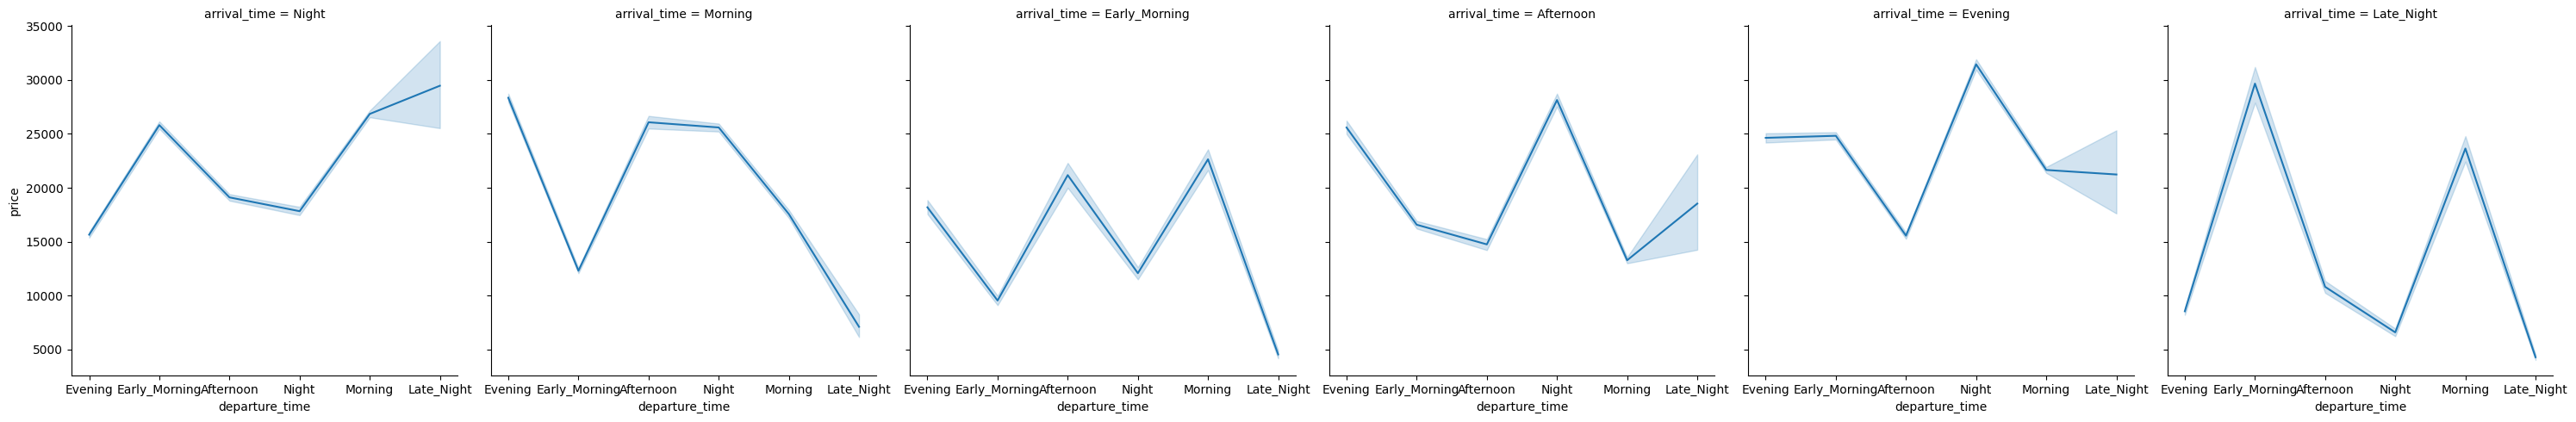

In [30]:
sns.relplot( x = 'departure_time', y = 'price', data = data, col = 'arrival_time', kind = 'line')

plt.show()

In [31]:
# Q.6. How the price changes with change in Source and Destination?


In [34]:
data.groupby('source_city')['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

In [35]:
data.groupby('destination_city')['price'].mean()

destination_city
Bangalore    21593.955784
Chennai      21953.323969
Delhi        18436.767870
Hyderabad    20427.661284
Kolkata      21959.557556
Mumbai       21372.529469
Name: price, dtype: float64

c:\Users\merav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


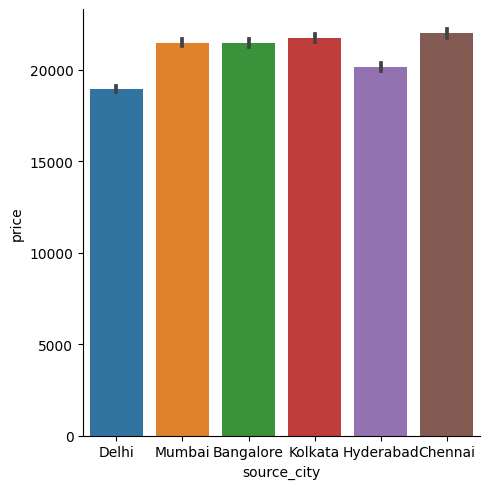

In [36]:
sns.catplot( x = 'source_city', y = 'price', kind = 'bar', data = data)

plt.show()

c:\Users\merav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


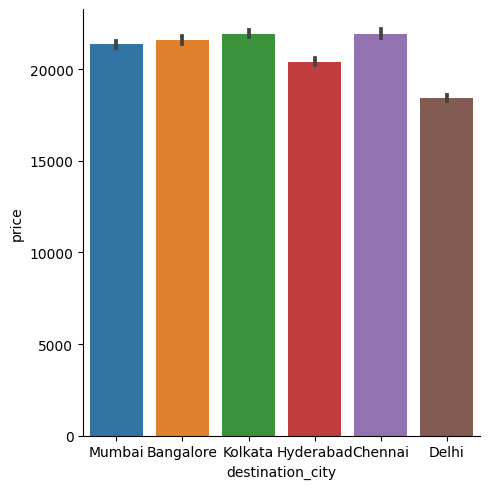

In [39]:
sns.catplot( x = 'destination_city', y = 'price', kind = 'bar', data = data)

plt.show()